In [46]:
#必要なライブラリ・モジュールの読み込み

#matplotlibの読み込み・日本語化
!pip install japanize-matplotlib
import pandas as pd
import matplotlib as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font="IPAexGothic")

#その他ライブラリの読み込み
import math
import numpy as np
import sympy as sp  
from sympy import symbols,Function,Eq
from sympy.solvers import ode
from matplotlib import pyplot as plt,animation,rc

from scipy.integrate import odeint

#カラーパレット
blue=(0,0,1)
lightblue=(0.5,0.5,1,0.5)
orange=(1,0.5,0)
lightorange=(1,0.75,0.5,0.5)
green=(0,1,0)
lightgreen=(0.5,1,0.5,0.5)
red=(1,0,0)
lightred=(1,0.5,0.5,0.5)
white=(1,1,1)

#シミュレーションの描画
fps = 5
simulation_time = 50 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,10]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**[参考文献]**

https://qiita.com/Sunset_Yuhi/items/d938718ad277eeab746c

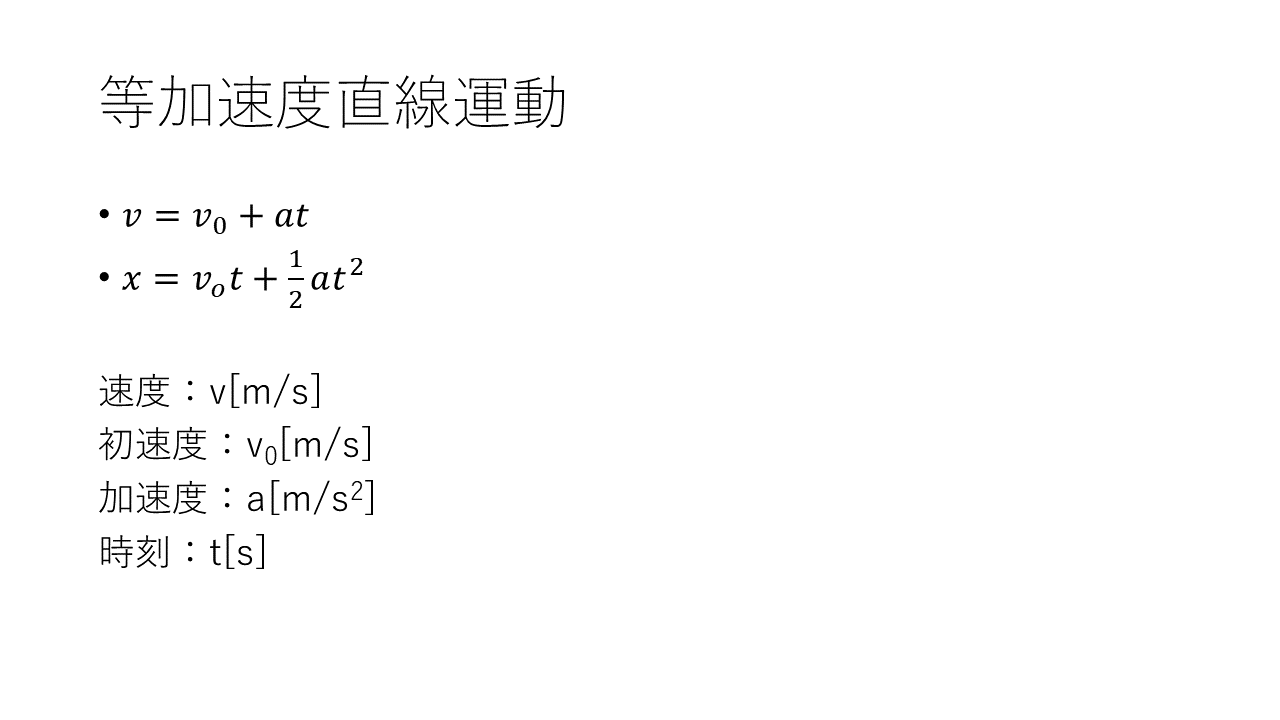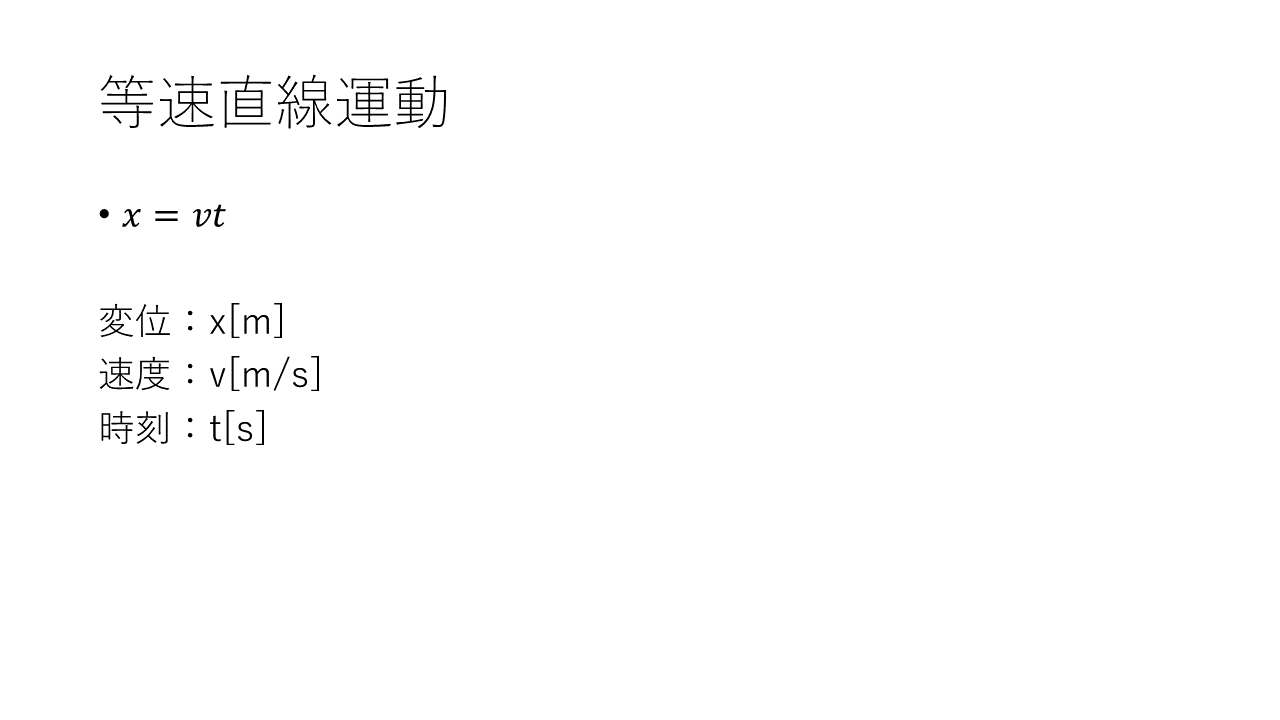

In [47]:
#等速・等加速直線運動

#グラフの描画範囲
figtop = 100
figbottom = 0
figleft = 0
figright = 100

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = a

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #初速度
    v0 = 20 #@param {type:"slider", min:0, max:50, step:5}
    #加速度
    a = 0 #@param {type:"slider", min:0, max:20, step:5}
    m_init = [0, v0]  #位置と速度の初期値
    m_list = odeint(func_motion, m_init, t_list)
    
    print ('初速度v0：%d[m/s]'%v0)
    print ('加速度a：%d[m/s^2]'%a)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,90,'時間：%d[s]'%(k/(fps*5)))
    plt.text(0,80,'速度：%d[m/s]'%abs(m_list[k,1]))

    plt.scatter(m_list[k,0],50,marker='o',color=blue,s=500)
    plt.scatter(m_list[0:k:sfi,0],(m_list[0:k:sfi,0]*0+50),marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

Output hidden; open in https://colab.research.google.com to view.

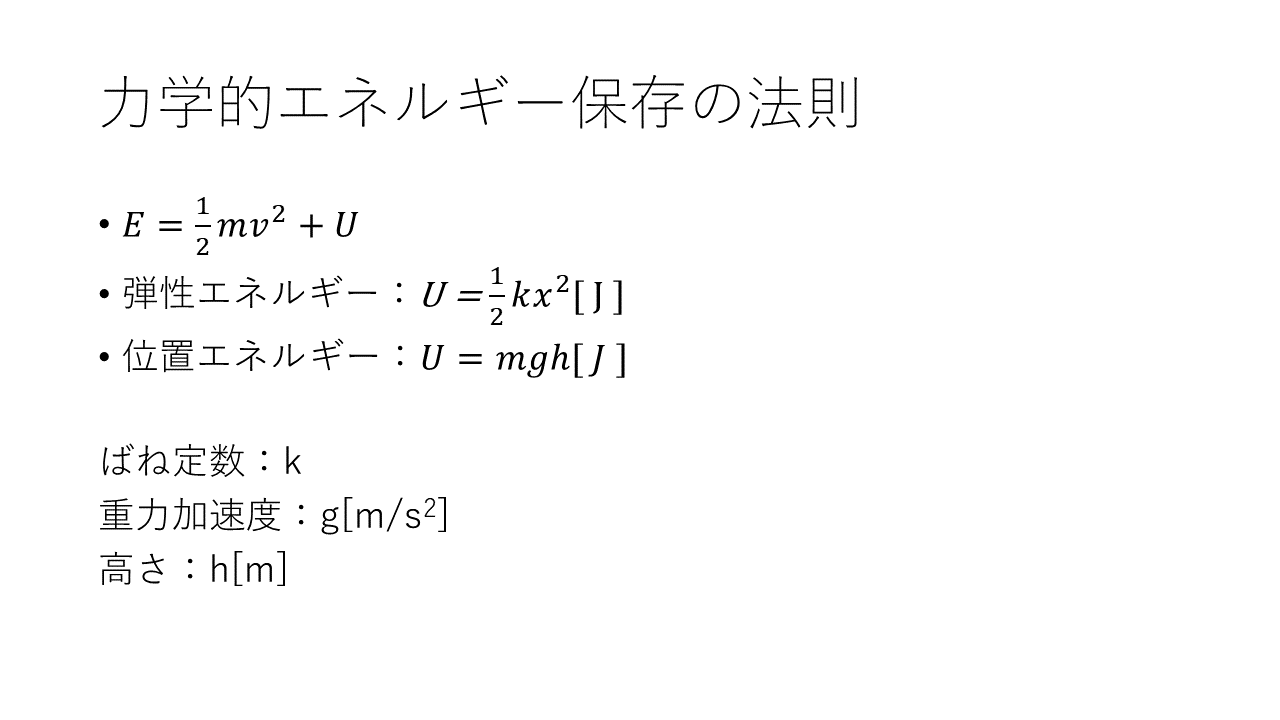

In [48]:
#自由落下

#グラフの描画範囲
figtop = 105
figbottom = -20
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、自由落下）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部：値はここ
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 40 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v0 = 0
    #高さ
    h = 100 #@param {type:"slider", min:0, max:100, step:10}
    gravity = 9.80665 #重力加速度
    m_init = [h, v0]  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, t_list)

    print ('質量m：%d[kg]'%m)
    print ('高さh：%d[m]'%h)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    U1=m*gravity*m_list[k,0]    #位置エネルギー
    U2=(1/2)*m*m_list[k,1]**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,90,'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,80,'速度：%d[m/s]'%-m_list[k,1])

    plt.scatter(2.5,m_list[k,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=blue,s=500)
    plt.scatter((m_list[0:k:sfi,0]*0+2.5),m_list[0:k:sfi,0],marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

質量m：40[kg]
高さh：100[m]


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [49]:
#シミュレーションの描画
fps = 5
simulation_time = 100 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,10]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)

In [ ]:
#鉛直投げ上げ

#グラフの描画範囲
figtop = 135
figbottom = -20
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v0 = 50 #@param {type:"slider", min:0, max:50, step:5}
    gravity = 9.80665   #重力加速度
    m_init = [0.0, v0]  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, t_list)

    print ('質量m：%d[kg]'%m)
    print ('初速度v0：%d[m/s]'%v0)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    U1=m*gravity*m_list[k,0]    #位置エネルギー
    U2=(1/2)*m*m_list[k,1]**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,120,'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,110,'速度：%d[m/s]'%m_list[k,1])

    plt.scatter(2.5,m_list[k,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=blue,s=500)
    plt.scatter((m_list[0:k:sfi,0]*0+2.5),m_list[0:k:sfi,0],marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#斜方投射

#グラフの描画範囲
figtop = 135
figbottom = -75
figleft = -20
figright = 550

#2階常微分方程式（運動方程式、等速直線運動）
def func_motion_x(var, t):
    dxdt = var[1]
    dvdt = 0

    return [dxdt, dvdt]

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion_y(var, t):
    dydt = var[1]
    dvdt = -gravity

    return [dydt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v0 = 50 #@param {type:"slider", min:0, max:50, step:5}
    #角度
    θ = 60 #@param {type:"slider", min:0, max:90, step:5}
    gravity = 9.80665   #重力加速度

    v0x = v0 * round(math.cos(math.radians(θ)), 3)
    v0y = v0 * round(math.sin(math.radians(θ)), 3)

    m_initx = [0.0, v0x]  #x座標の高さと速度の初期値
    m_inity = [0.0, v0y]  #y座標の高さと速度の初期値
    m_list_x = odeint(func_motion_x, m_initx, t_list)
    m_list_y = odeint(func_motion_y, m_inity, t_list)

    print ('質量m：%d[kg]'%m)
    print ('初速度v0：%d[m/s]'%v0)
    print ('角度θ：%d[°]'%θ)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    v=math.sqrt(m_list_x[k,1]**2+m_list_y[k,1]**2)
    U1=m*gravity*m_list_y[k,0]    #位置エネルギー
    U2=(1/2)*m*v**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,120,'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,110,'速度：%d[m/s]'%v)
    plt.text(0,100,'速度(x)：%d[m/s]'%m_list_x[k,1])
    plt.text(0,90,'速度(y)：%d[m/s]'%m_list_y[k,1])

    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=blue,s=500)
    plt.scatter(m_list_x[0:k:sfi,0],m_list_y[0:k:sfi,0],marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

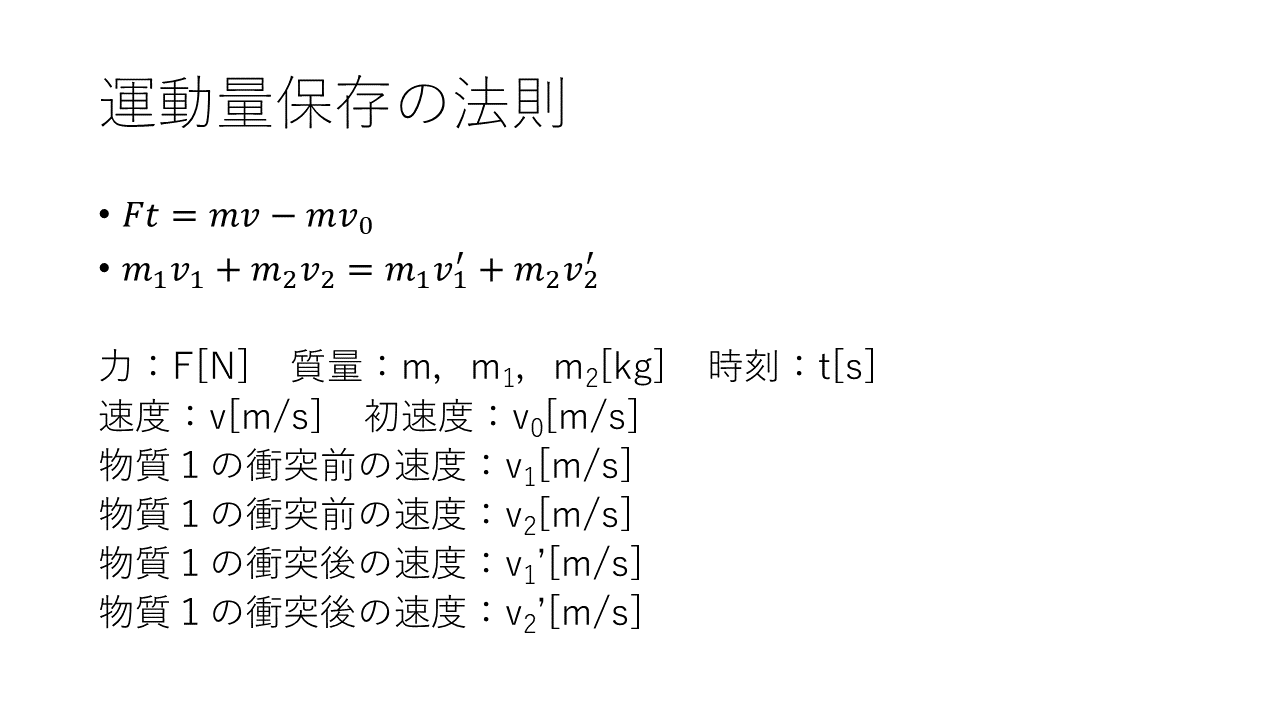

In [ ]:
#衝突運動

#global変数の定義
collisionTIME = 0
collision = False
collisionP = 0
collisionA = 1
x1 = 0
x2 = 0
v1 = 0
v2 = 0

#グラフの描画範囲
figtop = 100
figbottom = 0
figleft = 0
figright = 200

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = a

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定

    #質量
    m1 = 10 #@param {type:"slider", min:0, max:100, step:10}
    m2 = 20 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v01 = 30 #@param {type:"slider", min:0, max:50, step:5}
    v02 = 0 #@param {type:"slider", min:0, max:50, step:5}
    #加速度
    a = 0
    #反発係数
    e = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
    #衝突後の速度
    v1 = ( -v01 + v02 )*( 1 + e )/( m1/m2 + 1 ) + v01
    v2 = ( -v02 + v01 )*( 1 + e )/( m2/m1 + 1 ) + v02

    m_init_1_B = [0, v01]  #位置と速度の初期値
    m_init_2_B = [100, v02]  #位置と速度の初期値
    m_list_1_B = odeint(func_motion, m_init_1_B, t_list)
    m_list_2_B = odeint(func_motion, m_init_2_B, t_list)
    #衝突後
    m_init_1_A = [0, v1]  #位置と速度の初期値
    m_init_2_A = [0, v2]  #位置と速度の初期値
    m_list_1_A = odeint(func_motion, m_init_1_A, t_list)
    m_list_2_A = odeint(func_motion, m_init_2_A, t_list)

    print ('物体１初速度：%d[m/s]'%v01)
    print ('物体２初速度：%d[m/s]'%v02)
    print ('反発係数e：%.1f'%e)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    global collisionTIME,collision,collisionP,collisionA,x1,x2,v1,v2

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))

    if m_list_1_B[k,0] >= m_list_2_B[k,0]:  #衝突
      if collision == False:
        collisionP = m_list_1_B[k,0]  #衝突地点の記録
        collisionTIME = k             #衝突時刻の記録
        collisionA = 0
      collision = True

    if collision == False:
      x1 = m_list_1_B[k,0]
      x2 = m_list_2_B[k,0]
      v1 = m_list_1_B[k,1]
      v2 = m_list_2_B[k,1]

    if collision == True:  
      plt.scatter(m_list_1_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_1_B[0:k-collisionTIME:sfi,0]*0+50),marker='o',color=lightblue,s=600) #ストロボ
      plt.scatter(m_list_2_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_2_B[0:k-collisionTIME:sfi,0]*0+50),marker='o',color=lightred,s=500) #ストロボ
      x1 = m_list_1_A[k-collisionTIME,0]+collisionP
      x2 = m_list_2_A[k-collisionTIME,0]+collisionP
      v1 = m_list_1_A[k-collisionTIME,1]
      v2 = m_list_2_A[k-collisionTIME,1]

    plt.scatter(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0]*0+50),marker='o',color=lightblue,s=600) #ストロボ
    plt.scatter(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0]*0+50),marker='o',color=lightred,s=500) #ストロボ
    
    plt.scatter(x1,50,marker='o',color=blue,s=600)
    plt.scatter(x2,50,marker='o',color=red,s=500)
    plt.text(x1-4.5,47.5,'%d'%m1,color=white)
    plt.text(x2-4.5,47.5,'%d'%m2,color=white)
    plt.text(4,90,'物体１速度：%d[m/s]'%v1)
    plt.text(4,85,'物体２速度：%d[m/s]'%v2)
    plt.text(4,80,'衝突時刻：%d[s]'%(collisionTIME/(fps*10)))
    plt.text(4,95,'時間：%d[s]'%(k/(fps*10)))

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#シミュレーションの描画
fps = 5
simulation_time = 100 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,10]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)

In [ ]:
#自由落下

v = [0] * 10
m_list_f = []
i = 0
time = 0
first = True

#グラフの描画範囲
figtop = 105
figbottom = -20
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、自由落下）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部：値はここ
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v.append(0)
    #高さ
    h = 100 #@param {type:"slider", min:0, max:100, step:10}
    gravity = 9.80665 #重力加速度
    #反発係数
    e = 1 #@param {type:"slider", min:0, max:1, step:0.1}

    for j in range(10):
      m_init = [h, v[j]]
      m_list = odeint(func_motion, m_init, t_list)
      m_list_f.append(m_list)
      for i in range(500):
        if m_list[i,0] < 0:
          v[j] = m_list[i,1]
          #print ('最高速度v：%f[m/s]'%v[j])
          v[j+1] = -v[j] * e
          #print ('反発速度v：%f[m/s]'%v[j+1])
          h = 0
          break

    print ('質量m：%d[kg]'%m)
    print ('高さh：%d[m]'%h)

def update(k):
    global i,time,first

    if first == True:
      i = 0
      first = False

    sfi=25 #ストロボのフレーム間隔

    U1=m*gravity*m_list_f[i][k-time,0]    #位置エネルギー
    U2=(1/2)*m*m_list_f[i][k-time,1]**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,90,'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,80,'速度：%d[m/s]'%-m_list_f[i][k-time,1])

    plt.scatter((m_list_f[i][0:k-time:sfi,0]*0+2.5),m_list_f[i][0:k-time:sfi,0],marker='o',color=lightblue,s=500) #ストロボ
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=blue,s=500)
    if m_list_f[i][k-time,0] < 0:
      i = i + 1
      time = k
    if i > 9:
        i = 9

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#シミュレーションの描画
fps = 10
simulation_time = 50 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,10]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)